#Import

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

m10= pd.read_excel("% enter more 10 using.xlsx")

small=pd.read_excel("% enter 10-49 using.xlsx")

med=pd.read_excel("% enter 50-249 using.xlsx")

big=pd.read_excel("% enter more 250 using.xlsx")

prod_struct=pd.read_excel("numero aziende con almeno 250 dipendenti.xlsx")


pulizia e formato long

In [2]:
# --- Copia di lavoro
df = m10.copy()

# 1) pulizia nomi colonne
df.columns = [c.strip() for c in df.columns]   # "GEO " -> "GEO"
df = df.rename(columns={"GEO": "geo"})

# 2) converti anni in numerico (se ci sono stringhe tipo ":" o "NA" verranno messe a NaN)
year_cols = [c for c in df.columns if c.isdigit()]
for c in year_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# 3) long format: una riga per (paese, anno)
long = df.melt(id_vars="geo", value_vars=year_cols, var_name="year", value_name="pct")
long["year"] = long["year"].astype(int)



In [3]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# ---- Stile globale (puoi riusarlo per tutti i grafici) ----
FONT_FAMILY = "Arial"

COLOR_DEFAULT = "#D0D0D0"   # grigio chiaro
COLOR_EA = "#1f5cff"        # blu (elettrico ma meno "sparato" del #0057FF)
COLOR_EU = "#ff7a00"        # arancione

def bar_ranking_year_plotly(long, year=2025):
    d = long[long["year"] == year].dropna(subset=["pct"]).copy()

    # pulizia per highlight robusto
    d["geo_clean"] = d["geo"].astype(str).str.strip().str.lower()

    # ordina e rank (1 = massimo)
    d = d.sort_values("pct", ascending=False).reset_index(drop=True)
    d["rank"] = np.arange(1, len(d) + 1)
    d["geo_rank_label"] = d["rank"].astype(str) + ") " + d["geo"].astype(str).str.strip()

    # colori per barra
    def pick_color(g):
        if g == "euro area":
            return COLOR_EA
        if g.startswith("european union"):
            return COLOR_EU
        return COLOR_DEFAULT

    d["bar_color"] = d["geo_clean"].apply(pick_color)

    # testo percentuale e colore testo coerente
    d["value_label"] = d["pct"].map(lambda x: f"{x:.1f}%")
    def pick_text_color(g):
        if g == "euro area" or g.startswith("european union"):
            return "rgba(0,0,0,0.95)"
        return "rgba(0,0,0,0.55)"
    d["text_color"] = d["geo_clean"].apply(pick_text_color)

    # altezza dinamica (simile al tuo matplotlib)
    height = max(520, int(26 * len(d) + 180))

    fig = go.Figure()

    fig.add_trace(
        go.Bar(
            x=d["pct"],
            y=d["geo_rank_label"],
            orientation="h",
            marker=dict(color=d["bar_color"]),
            hovertemplate="<b>%{y}</b><br>%{x:.1f}%<extra></extra>",
            text=d["value_label"],
            textposition="outside",
            cliponaxis=False,  # permette al testo di uscire dal plot
        )
    )

    # asse Y: rank 1 in alto (invertendo l'ordine)
    fig.update_yaxes(autorange="reversed")

    # un po' di padding a destra per far stare le etichette
    xmax = float(np.nanmax(d["pct"])) if len(d) else 100
    fig.update_xaxes(range=[0, min(100, xmax + 8)])

    # layout professionale
    fig.update_layout(
        template="plotly_white",
        height=height,
        margin=dict(l=170, r=50, t=110, b=60),
        font=dict(family=FONT_FAMILY, size=13),
        title=dict(
            text=f"<span style='color:#0D3C9A; font-size:20px;'><b>Use of AI technologies in enterprises — {year}</b></span>"
                 f"<br><span style='color:rgba(0,0,0,0.55); font-size:13px;'>Euro Area (blue) and European Union (orange)</span>",
            x=0.01,
            xanchor="left",
            y=0.97
        ),
        showlegend=False,
    )

    # griglia “leggera” solo su x
    fig.update_xaxes(
        title_text="Enterprises (≥10 employees) using AI technologies (%)",
        ticksuffix="%",
        showgrid=True,
        gridcolor="rgba(0,0,0,0.08)",
        zeroline=False
    )
    fig.update_yaxes(
        title_text="",
        showgrid=False
    )

    return fig


# Esempio d'uso:
# fig = bar_ranking_year_plotly(long, year=2025)
# fig.show()


In [4]:
fig = bar_ranking_year_plotly(long, year=2025)
fig.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

def apply_clean_style(ax, title=None, subtitle=None):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(True, axis="x", alpha=0.15)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

    if title:
        ax.set_title(
            title,
            loc="left",
            fontsize=16,
            fontweight="bold",
            pad=20,
            color="#0D3C9A"  # titolo blu elettrico
        )

    if subtitle:
        ax.text(
            0,
            1.06,
            subtitle,
            transform=ax.transAxes,
            ha="left",
            va="bottom",
            fontsize=11,
            color="0.35"
        )


def bar_ranking_year(long, year=2025):
    d = long[long["year"] == year].dropna(subset=["pct"]).copy()

    # matching robusto per highlight
    d["geo_clean"] = d["geo"].astype(str).str.strip().str.lower()

    # ordina: in alto i valori più alti (rank 1 = massimo)
    d = d.sort_values("pct", ascending=False).reset_index(drop=True)
    d["rank"] = np.arange(1, len(d) + 1)

    # etichette con rank
    d["geo_rank_label"] = d["rank"].astype(str) + ") " + d["geo"].astype(str).str.strip()

    # palette
    COLOR_DEFAULT = "#D0D0D0"   # grigio chiaro
    COLOR_EA = "#0057FF"        # blu elettrico
    COLOR_EU = "#FF7A00"        # arancione acceso

    colors = []
    for g in d["geo_clean"]:
        if g == "euro area":
            colors.append(COLOR_EA)
        elif g.startswith("european union"):
            colors.append(COLOR_EU)
        else:
            colors.append(COLOR_DEFAULT)

    fig, ax = plt.subplots(figsize=(10, max(6, 0.28 * len(d))))

    ax.barh(
        d["geo_rank_label"],
        d["pct"],
        color=colors,
        edgecolor="none"
    )

    # per avere rank 1 in alto
    ax.invert_yaxis()

    ax.set_xlabel("Enterprises (≥10 employees) using AI technologies (%)")

    apply_clean_style(
        ax,
        title=f"Use of AI technologies in enterprises — {year}",
        subtitle="Euro Area (blue) and European Union (orange)"
    )

    # etichette percentuali a destra
    for y, (g_clean, v) in enumerate(zip(d["geo_clean"], d["pct"])):
        ax.text(
            v + 0.6,
            y,
            f"{v:.1f}%",
            va="center",
            fontsize=9,
            color="black" if (g_clean == "euro area" or g_clean.startswith("european union")) else "0.45"
        )

    plt.tight_layout()
    return fig, ax


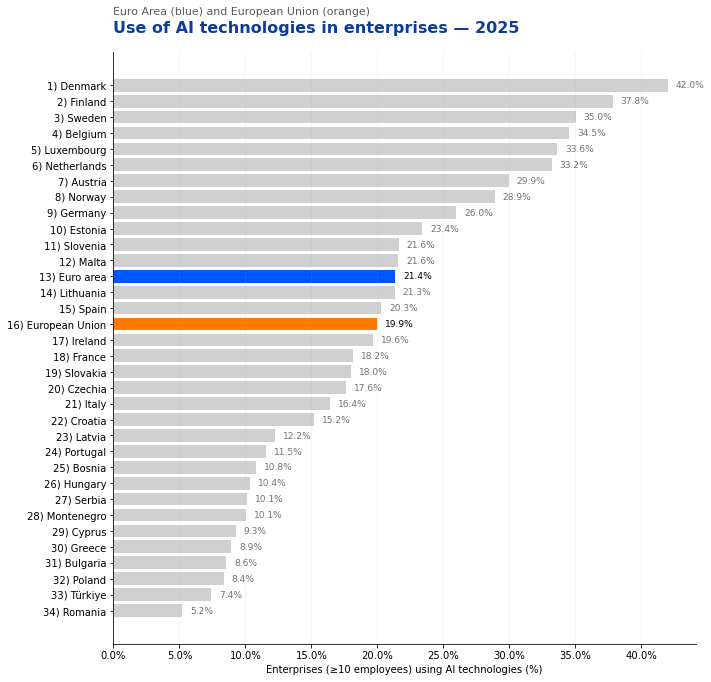

In [6]:
fig, ax = bar_ranking_year(long, year=2025)
plt.savefig("fig1", dpi = 300)
plt.show()

In [7]:

import numpy as np
import matplotlib.pyplot as plt

def delta_bar_chart(long):
    d = long[long["year"].isin([2023, 2025])].copy()
    d["geo"] = d["geo"].astype(str).str.strip()

    pivot = d.pivot(index="geo", columns="year", values="pct").dropna()
    pivot["delta"] = pivot[2025] - pivot[2023]

    # ordina per crescita (in alto chi cresce di più)
    pivot = pivot.sort_values("delta", ascending=False).reset_index()
    pivot["rank"] = np.arange(1, len(pivot) + 1)

    # etichette con ranking
    pivot["geo_rank_label"] = pivot["rank"].astype(str) + ") " + pivot["geo"]

    # colori: EU arancione, altri blu
    EU_ORANGE = "#FF7A00"
    TITLE_BLUE = "#0D3C9A"

    geo_clean = pivot["geo"].str.lower()
    colors = np.where(geo_clean.str.startswith("european union"), EU_ORANGE, TITLE_BLUE)

    fig, ax = plt.subplots(figsize=(10, max(6, 0.28 * len(pivot))))

    ax.barh(
        pivot["geo_rank_label"],
        pivot["delta"],
        color=colors
    )

    # rank 1 in alto
    ax.invert_yaxis()

    ax.axvline(0, color="black", linewidth=1)
    ax.set_xlabel("Change in percentage points (2025 − 2023)")

    ax.set_title(
        "Growth in AI adoption across countries",
        loc="left",
        fontsize=16,
        fontweight="bold",
        color=TITLE_BLUE,
        pad=20
    )

    # etichette valore a destra/sinistra
    for y, v in enumerate(pivot["delta"]):
        ax.text(
            v + (0.3 if v >= 0 else -0.3),
            y,
            f"{v:+.1f} pp",
            va="center",
            ha="left" if v >= 0 else "right",
            fontsize=9,
            color="0.25"
        )

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(True, axis="x", alpha=0.2)

    plt.tight_layout()
    return fig, ax


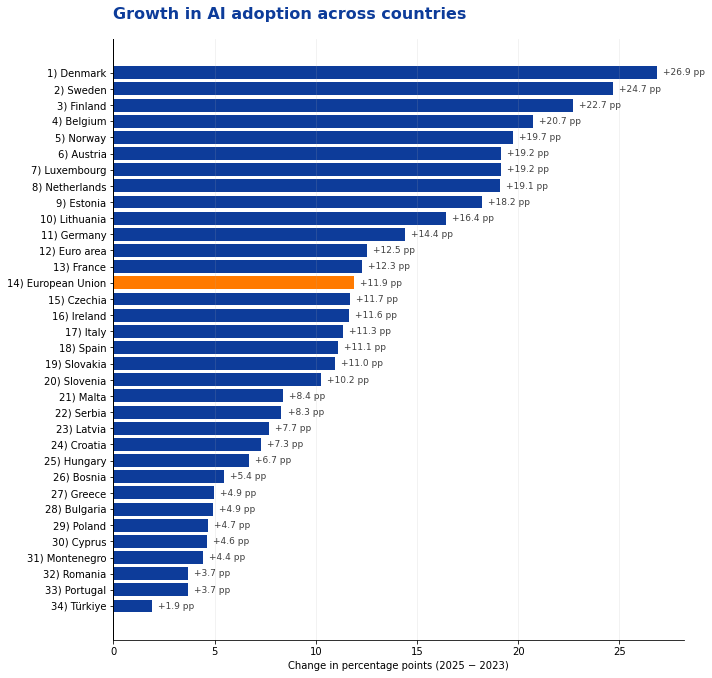

In [8]:
fig, ax = delta_bar_chart(long)

fig.savefig("fig2.png", dpi=300, bbox_inches="tight")

Trasformazione small, med e big in formato long

In [9]:
def to_long(df):
    df = df.copy()
    df.columns = df.columns.str.strip()
    df = df.rename(columns={"GEO": "geo"})

    long = df.melt(
        id_vars="geo",
        var_name="year",
        value_name="pct"
    )

    long["year"] = long["year"].astype(int)
    return long

small_long = to_long(small)
med_long   = to_long(med)
big_long   = to_long(big)

#colonne: geo, year, pct


In [10]:
small_long[(small_long["geo"] == "European Union") & (small_long["year"] == 2025)]

,geo,year,pct
72,European Union,2025,17


In [11]:
med_long[(med_long["geo"] == "European Union") & (med_long["year"] == 2025)]

,geo,year,pct
72,European Union,2025,30.36


In [12]:
big_long[(big_long["geo"] == "European Union") & (big_long["year"] == 2025)]

,geo,year,pct
72,European Union,2025,55.03


In [13]:
#PREPARAZIONE AI GRAFICI
import pandas as pd
import matplotlib.pyplot as plt

eu_2025 = pd.DataFrame({
    "Size": ["Small Enterprises", "Medium Enterprises", "Large Enterprises"],
    "pct": [
        small_long.loc[(small_long["geo"] == "European Union") & (small_long["year"] == 2025), "pct"].values[0],
        med_long.loc[(med_long["geo"] == "European Union") & (med_long["year"] == 2025), "pct"].values[0],
        big_long.loc[(big_long["geo"] == "European Union") & (big_long["year"] == 2025), "pct"].values[0],
    ]
})


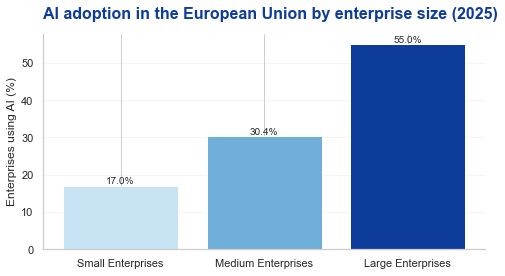

In [28]:
fig, ax = plt.subplots(figsize=(7, 4))

ax.bar(
    eu_2025["Size"],
    eu_2025["pct"],
    color=["#C7E2F2", "#6FAED9", "#0D3C9A"]
)

for i, v in enumerate(eu_2025["pct"]):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=10)

ax.set_ylabel("Enterprises using AI (%)")
ax.set_title(
    "AI adoption in the European Union by enterprise size (2025)",
    loc="left",
    fontsize=16,
    fontweight="bold",
    color="#0D3C9A",
    pad=15
)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(True, axis="y", alpha=0.2)



plt.tight_layout()
plt.savefig("fig3", dpi = 300)
plt.show()

#CON QUESTO GRAFICO VA SPECIFICATO COSA INTENDIAMO PER SMALL MEDIUM E LARGE (10-49, 50-249, PIU DI 249)


Mappa Geografica con plotly

In [15]:
import plotly.graph_objects as go

fig = go.Figure()

colors = ["#C7E2F2", "#6FAED9", "#0D3C9A"]

fig.add_trace(
    go.Bar(
        x=eu_2025["Size"],
        y=eu_2025["pct"],
        marker_color=colors,
        text=[f"{v:.1f}%" for v in eu_2025["pct"]],
        textposition="outside",
        cliponaxis=False,
        hovertemplate="%{x}<br>%{y:.1f}%<extra></extra>"
    )
)

fig.update_layout(
    template="plotly_white",
    width=700,
    height=400,
    margin=dict(l=60, r=30, t=90, b=60),
    font=dict(family="Arial", size=13),
    title=dict(
        text="<b style='color:#0D3C9A;'>AI adoption in the European Union by enterprise size (2025)</b>",
        x=0.01,
        xanchor="left"
    ),
    yaxis=dict(
        title="Enterprises using AI (%)",
        ticksuffix="%",
        showgrid=True,
        gridcolor="rgba(0,0,0,0.12)",
        zeroline=False
    ),
    xaxis=dict(
        title="Enterprise size",
        showgrid=False
    ),
    showlegend=False
)

fig.show()


In [16]:
import plotly.express as px

EUROPE_COUNTRIES = [
    "Belgium", "Bulgaria", "Czechia", "Denmark", "Germany", "Estonia",
    "Ireland", "Greece", "Spain", "France", "Croatia", "Italy", "Cyprus",
    "Latvia", "Lithuania", "Luxembourg", "Hungary", "Malta", "Netherlands",
    "Austria", "Poland", "Portugal", "Romania", "Slovenia", "Slovakia",
    "Finland", "Sweden", "Norway", "Bosnia and Herzegovina", "Montenegro",
    "North Macedonia", "Albania", "Serbia", "Türkiye"
]

def map_ai_selected_europe(long, year=2025):
    # filtra anno
    d = long[long["year"] == year].copy()
    d["geo"] = d["geo"].astype(str).str.strip()

    # tieni solo i paesi europei selezionati
    d = d[d["geo"].isin(EUROPE_COUNTRIES)]

    fig = px.choropleth(
        d,
        locations="geo",
        locationmode="country names",
        color="pct",
        scope="europe",
        color_continuous_scale=["#E6EEFF", "#0D3C9A"],
        labels={"pct": "Enterprises using AI (%)"},
        title=f"AI adoption in enterprises (≥10 employees) — {year}"
    )

    fig.update_layout(
        title=dict(
            text=f"<b>AI adoption in enterprises (≥10 employees) — {year}</b>",
            x=0.01,
            xanchor="left",
            font=dict(size=20, color="#0D3C9A", family="Arial")
        ),
        margin=dict(l=10, r=10, t=70, b=10),
        coloraxis_colorbar=dict(title="%", tickformat=".0f")
    )

    fig.show()
    return fig


In [27]:
fig = map_ai_selected_europe(long, year=2025)

fig.write_image(
    "fig4.png",
    width=2100,
    height=1400
)


C:\Users\bassi\AppData\Local\Temp\ipykernel_53352\622599628.py:20: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



Sembra che ci sia una suddivisione molto distinda tra i paesi dell'est (con una bassa percentuale), i paesi del sud (percentuale media) e quelli del nord(tra le percentuali piu alte. )

costruzione dataset con INDICE DI INTENSITA' DIGITALE.
L’indice di digitalizzazione è costruito come media di tre sub-indici standardizzati, relativi alla diffusione del digitale nelle imprese (pc_ent), nel mercato del lavoro (pc_emp) e nell’utilizzo di Internet da parte degli individui (pc_int)

In [18]:
import pandas as pd
import numpy as np

# =========================
# CONFIG
# =========================
UNITS = {
    "pc_ent": "enterprises",
    "pc_emp": "employment",
    "pc_int": "internet_use",
}

# classificazione richiesta
NORTH_EUROPE = {
    "Denmark", "Finland", "Sweden", "Norway",
    "Netherlands", "Belgium"
}
SOUTH_EUROPE = {
    "Germany", "France", "Austria", "Italy", "Spain",
    "Portugal", "Ireland", "Luxembourg", "Malta"
}
EAST_EUROPE = {
    "Bulgaria", "Romania", "Hungary", "Poland", "Czechia",
    "Slovakia", "Slovenia", "Croatia",
    "Estonia", "Latvia", "Lithuania",
    "Greece", "Cyprus",
    "Bosnia and Herzegovina", "Montenegro",
    "North Macedonia", "Albania", "Serbia"
}

# se non in lista → classificazione "mia"
FALLBACK_LABEL = "OTHER_EUROPE"

# scaling per anno: z-score
def zscore_by_year(s: pd.Series) -> pd.Series:
    mu = s.mean(skipna=True)
    sd = s.std(skipna=True, ddof=0)
    if pd.isna(sd) or sd == 0:
        return pd.Series(np.nan, index=s.index)
    return (s - mu) / sd

# =========================
# LOAD
# =========================
df = pd.read_csv("desi.csv")

# colonne minime attese
needed = {"period", "country", "indicator", "unit", "value"}
missing = needed - set(df.columns)
if missing:
    raise ValueError(f"Colonne mancanti: {missing}. Presenti: {df.columns.tolist()}")

df["period"] = pd.to_numeric(df["period"], errors="coerce").astype("Int64")
df["value"]  = pd.to_numeric(df["value"], errors="coerce")
df = df.dropna(subset=["country", "period", "indicator", "unit", "value"]).copy()

# =========================
# GEO (nome esteso paese)
# =========================
# 1) Se nel CSV esiste già una colonna con nome paese, usala.
geo_col_candidates = ["geo", "country_name", "country_label", "name"]
geo_col = next((c for c in geo_col_candidates if c in df.columns), None)

if geo_col is None:
    # 2) fallback: mappa ISO2 -> nome (copre EU + vicini più comuni)
    iso2_to_name = {
        "AT":"Austria","BE":"Belgium","BG":"Bulgaria","HR":"Croatia","CY":"Cyprus","CZ":"Czechia",
        "DK":"Denmark","EE":"Estonia","FI":"Finland","FR":"France","DE":"Germany","GR":"Greece",
        "HU":"Hungary","IE":"Ireland","IT":"Italy","LV":"Latvia","LT":"Lithuania","LU":"Luxembourg",
        "MT":"Malta","NL":"Netherlands","PL":"Poland","PT":"Portugal","RO":"Romania","SK":"Slovakia",
        "SI":"Slovenia","ES":"Spain","SE":"Sweden",

        # EFTA / Balkans / altri spesso presenti nel DESI tool
        "NO":"Norway","IS":"Iceland","LI":"Liechtenstein","CH":"Switzerland","UK":"United Kingdom",
        "BA":"Bosnia and Herzegovina","ME":"Montenegro","MK":"North Macedonia","AL":"Albania","RS":"Serbia",
        "TR":"Turkey","UA":"Ukraine","MD":"Moldova","GE":"Georgia","AM":"Armenia","AZ":"Azerbaijan",
        "XK":"Kosovo",
    }
    df["geo"] = df["country"].astype(str).map(iso2_to_name).fillna(df["country"].astype(str))
else:
    df["geo"] = df[geo_col].astype(str)

# =========================
# COSTRUZIONE INDICE
# (1) per ogni unit: media su breakdown dentro indicator
# (2) z-score per anno
# (3) media tra indicator
# (4) media tra unit (pc_ent, pc_emp, pc_int)
# =========================
sub_indices = []

for unit, label in UNITS.items():
    d = df[df["unit"] == unit].copy()
    if d.empty:
        # se una unit manca del tutto, la ignoro (indice medio su quelle presenti)
        continue

    # aggrega dentro indicatore: evita overweight per indicatori con più breakdown/record
    d = d.groupby(["geo", "period", "indicator"], as_index=False)["value"].mean()

    # scala per anno
    d["scaled"] = d.groupby("period")["value"].transform(zscore_by_year)

    # sub-indice per unit: media fra indicatori
    idx = (
        d.groupby(["geo", "period"], as_index=False)["scaled"]
        .mean()
        .rename(columns={"scaled": f"index_{label}"})
    )
    sub_indices.append(idx)

if not sub_indices:
    raise ValueError("Nessuna delle unit pc_ent, pc_emp, pc_int è presente nel CSV.")

out = sub_indices[0]
for other in sub_indices[1:]:
    out = out.merge(other, on=["geo", "period"], how="outer")

index_cols = [c for c in out.columns if c.startswith("index_")]
out["digital_index"] = out[index_cols].mean(axis=1, skipna=True)

# =========================
# YEAR + EU_POS
# =========================
out = out.rename(columns={"period": "year"})

def classify_eu_pos(country_name: str) -> str:
    if country_name in NORTH_EUROPE:
        return "NORTH_EUROPE"
    if country_name in SOUTH_EUROPE:
        return "SOUTH_EUROPE"
    if country_name in EAST_EUROPE:
        return "EAST_EUROPE"

    # classificazione "mia" per fuori-lista:
    # - Nordici non citati
    if country_name in {"Iceland"}:
        return "NORTH_EUROPE"
    # - Europa occidentale/centrale tipica
    if country_name in {"Switzerland", "Liechtenstein", "United Kingdom"}:
        return "SOUTH_EUROPE"  # scelta pragmatica: “West/Central” confluisce qui
    # - Paesi baltici/nell’orbita est già coperti; altri vicini esterni UE
    if country_name in {"Turkey", "Ukraine", "Moldova", "Georgia", "Armenia", "Azerbaijan", "Kosovo"}:
        return "EAST_EUROPE"

    return FALLBACK_LABEL

out["eu_pos"] = out["geo"].apply(classify_eu_pos)

# =========================
# OUTPUT FINALE (solo le colonne richieste)
# =========================
final_df = out[["geo", "digital_index", "year", "eu_pos"]].sort_values(["year", "geo"]).reset_index(drop=True)

final_df.to_csv("digital_index_geo_year.csv", index=False)
final_df["digital_index"] = final_df.groupby("year")["digital_index"].transform(lambda x: 100 * (x - x.min()) / (x.max() - x.min()) if x.max() > x.min() else 0)

print(final_df.head(20))
print("\nSalvato in: digital_index_geo_year.csv")


c:\Users\bassi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.



           geo  digital_index  year        eu_pos
0      Austria      31.707317  2004  SOUTH_EUROPE
1      Belgium      43.902439  2004  NORTH_EUROPE
2     Bulgaria      14.634146  2004   EAST_EUROPE
3      Croatia       0.000000  2004   EAST_EUROPE
4       Cyprus      14.634146  2004   EAST_EUROPE
5      Czechia      43.902439  2004   EAST_EUROPE
6      Denmark      65.853659  2004  NORTH_EUROPE
7           EL      29.268293  2004  OTHER_EUROPE
8           EU      36.585366  2004  OTHER_EUROPE
9      Estonia      39.024390  2004   EAST_EUROPE
10     Finland      87.804878  2004  NORTH_EUROPE
11      France      58.536585  2004  SOUTH_EUROPE
12     Germany      41.463415  2004  SOUTH_EUROPE
13     Hungary      68.292683  2004   EAST_EUROPE
14     Ireland      51.219512  2004  SOUTH_EUROPE
15       Italy      31.707317  2004  SOUTH_EUROPE
16      Latvia      29.268293  2004   EAST_EUROPE
17   Lithuania       4.878049  2004   EAST_EUROPE
18  Luxembourg      56.097561  2004  SOUTH_EUROPE


Grafico andamento della digitalizzazione per area europea. 

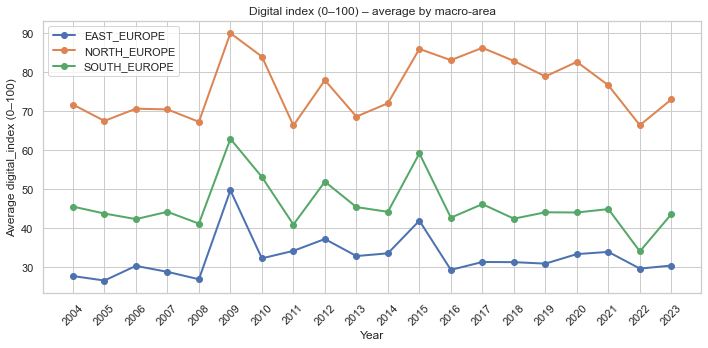

In [ ]:
import matplotlib.pyplot as plt

# media per anno e macro-area
agg = (final_df[final_df["eu_pos"].isin(["EAST_EUROPE","SOUTH_EUROPE","NORTH_EUROPE"])]
       .groupby(["year","eu_pos"], as_index=False)["digital_index"].mean()
       .sort_values("year"))

wide = agg.pivot(index="year", columns="eu_pos", values="digital_index").sort_index()

plt.figure(figsize=(10,5))
for c in wide.columns:
    plt.plot(wide.index, wide[c], marker="o", linewidth=2, label=c)

plt.title("Digital index (0–100) – average by macro-area")
plt.xlabel("Year")
plt.ylabel("Average digital_index (0–100)")
plt.xticks(wide.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("fig5", dpi = 300)
plt.show()



In [20]:
import pandas as pd
import plotly.graph_objects as go

# -------------------------
# Prepara i dati
# -------------------------
agg = (
    final_df[final_df["eu_pos"].isin(["EAST_EUROPE", "SOUTH_EUROPE", "NORTH_EUROPE"])]
    .groupby(["year", "eu_pos"], as_index=False)["digital_index"]
    .mean()
    .sort_values("year")
)

wide = agg.pivot(index="year", columns="eu_pos", values="digital_index").sort_index()

# Colori forniti
colors = {
    "SOUTH_EUROPE": "#636EFA",
    "NORTH_EUROPE": "#EF553B",
    "EAST_EUROPE": "#00CC96"
}

# -------------------------
# Plot
# -------------------------
fig = go.Figure()

for c in wide.columns:
    fig.add_trace(
        go.Scatter(
            x=wide.index,
            y=wide[c],
            mode="lines+markers",
            name=c,
            line=dict(width=3, color=colors[c]),
            marker=dict(size=8),
            hovertemplate="Year %{x}<br>Digital index: %{y:.1f}<extra></extra>"
        )
    )

fig.update_layout(
    template="plotly_white",
    width=900,
    height=450,
    margin=dict(l=60, r=40, t=80, b=60),
    font=dict(family="Arial", size=13),

    title=dict(
        text="<b>Digital index (0–100) — average by macro-area</b>",
        x=0.01,
        xanchor="left"
    ),

    xaxis=dict(
        title="Year",
        tickangle=0,
        showgrid=False
    ),

    yaxis=dict(
        title="Average digital index (0–100)",
        showgrid=True,
        gridcolor="rgba(0,0,0,0.12)",
        zeroline=False
    ),

    legend=dict(
        title="Macro-area:",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig.show()


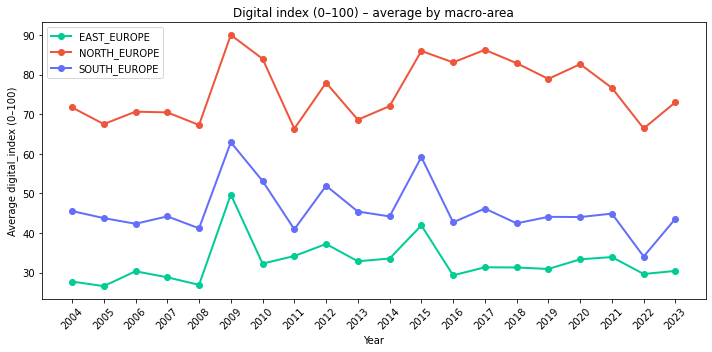

In [21]:
import matplotlib.pyplot as plt

# media per anno e macro-area
agg = (
    final_df[final_df["eu_pos"].isin(["EAST_EUROPE", "SOUTH_EUROPE", "NORTH_EUROPE"])]
    .groupby(["year", "eu_pos"], as_index=False)["digital_index"]
    .mean()
    .sort_values("year")
)

wide = agg.pivot(index="year", columns="eu_pos", values="digital_index").sort_index()

# colori per macro-area (quelli dell'immagine)
colors = {
    "SOUTH_EUROPE": "#636EFA",  # blu
    "NORTH_EUROPE": "#EF553B",  # arancione
    "EAST_EUROPE": "#00CC96"    # verde
}

plt.figure(figsize=(10, 5))

for c in wide.columns:
    plt.plot(
        wide.index,
        wide[c],
        marker="o",
        linewidth=2,
        label=c,
        color=colors[c]
    )

plt.title("Digital index (0–100) – average by macro-area")
plt.xlabel("Year")
plt.ylabel("Average digital_index (0–100)")
plt.xticks(wide.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


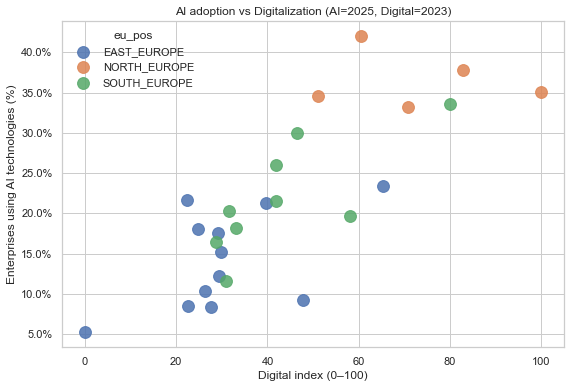

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# ------------------------------------------------
# 0) Pulisci nomi colonne e rinomina GEO -> geo
# ------------------------------------------------
m10 = m10.copy()
m10.columns = m10.columns.str.strip()          # rimuove spazi tipo 'GEO '
m10 = m10.rename(columns={"GEO": "geo"})       # ora funziona

# ------------------------------------------------
# 1) AI adoption: solo 2025 da m10
# ------------------------------------------------
m10_ai = m10[["geo", "2025"]].rename(columns={"2025": "ai_pct"})
m10_ai["ai_pct"] = pd.to_numeric(m10_ai["ai_pct"], errors="coerce")

# ------------------------------------------------
# 2) Digital index: solo anno più recente da final_df
# ------------------------------------------------
latest_year = final_df["year"].max()

df_dig_latest = (
    final_df[final_df["year"] == latest_year][["geo", "digital_index", "eu_pos"]]
    .drop_duplicates(subset=["geo"])
)

df_dig_latest["digital_index"] = pd.to_numeric(df_dig_latest["digital_index"], errors="coerce")

# ------------------------------------------------
# 3) Merge
# ------------------------------------------------
plot_df = df_dig_latest.merge(m10_ai, on="geo", how="inner")
plot_df = plot_df.dropna(subset=["digital_index", "ai_pct", "eu_pos"])

# ------------------------------------------------
# 4) Plot
# ------------------------------------------------
fig, ax = plt.subplots(figsize=(9, 6))

for grp, g in plot_df.groupby("eu_pos"):
    ax.scatter(g["digital_index"], g["ai_pct"], s=140, alpha=0.85, label=grp)

ax.set_xlabel("Digital index (0–100)")
ax.set_ylabel("Enterprises using AI technologies (%)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

ax.set_title(f"AI adoption vs Digitalization (AI=2025, Digital={latest_year})")
ax.legend(frameon=False, title="eu_pos")

plt.subplots_adjust(top=0.88)
plt.savefig("fig6", dpi = 300)
plt.show()


In [23]:
import pandas as pd
import plotly.express as px

# -----------------------------
# 0) Prepara i dati
# -----------------------------
m10 = m10.copy()
m10.columns = m10.columns.str.strip()          # toglie spazi tipo 'GEO '
m10 = m10.rename(columns={"GEO": "geo"})       # GEO -> geo

# AI %: solo 2025
m10_ai = m10[["geo", "2025"]].rename(columns={"2025": "ai_pct"})
m10_ai["ai_pct"] = pd.to_numeric(m10_ai["ai_pct"], errors="coerce")

# Digital index: solo anno più recente
latest_year = final_df["year"].max()
df_dig_latest = (
    final_df[final_df["year"] == latest_year][["geo", "digital_index", "eu_pos"]]
    .drop_duplicates(subset=["geo"])
)
df_dig_latest["digital_index"] = pd.to_numeric(df_dig_latest["digital_index"], errors="coerce")

# Merge + pulizia
plot_df = df_dig_latest.merge(m10_ai, on="geo", how="inner")
plot_df = plot_df.dropna(subset=["digital_index", "ai_pct", "eu_pos"])

# -----------------------------
# 1) Plot (Plotly)
# -----------------------------
fig = px.scatter(
    plot_df,
    x="digital_index",
    y="ai_pct",
    color="eu_pos",
    hover_name="geo",                 # tooltip col nome paese
    title=f"AI adoption vs Digitalization (AI=2025, Digital={latest_year})",
    labels={
        "digital_index": "Digital index (0–100)",
        "ai_pct": "Enterprises using AI technologies (%)",
        "eu_pos": "EU position"
    }
)

fig.update_traces(marker=dict(size=12, opacity=0.85))
fig.update_layout(template="plotly_white")     # look pulito professionale
fig.update_yaxes(ticksuffix="%")               # percentuale

fig.show()


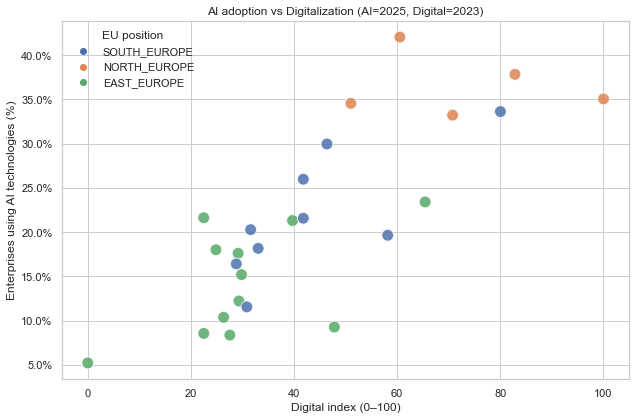

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# --- (stessa preparazione dati identica a sopra) ---
m10 = m10.copy()
m10.columns = m10.columns.str.strip()
m10 = m10.rename(columns={"GEO": "geo"})

m10_ai = m10[["geo", "2025"]].rename(columns={"2025": "ai_pct"})
m10_ai["ai_pct"] = pd.to_numeric(m10_ai["ai_pct"], errors="coerce")

latest_year = final_df["year"].max()
df_dig_latest = (
    final_df[final_df["year"] == latest_year][["geo", "digital_index", "eu_pos"]]
    .drop_duplicates(subset=["geo"])
)
df_dig_latest["digital_index"] = pd.to_numeric(df_dig_latest["digital_index"], errors="coerce")

plot_df = df_dig_latest.merge(m10_ai, on="geo", how="inner").dropna(subset=["digital_index","ai_pct","eu_pos"])

# --- Plot (Seaborn) ---
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(
    data=plot_df,
    x="digital_index",
    y="ai_pct",
    hue="eu_pos",
    s=140,
    alpha=0.85,
    ax=ax
)

ax.set_xlabel("Digital index (0–100)")
ax.set_ylabel("Enterprises using AI technologies (%)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
ax.set_title(f"AI adoption vs Digitalization (AI=2025, Digital={latest_year})")
ax.legend(frameon=False, title="EU position")

plt.tight_layout()
plt.show()
